# Domain Data

## Library Import

In [380]:
import scanpy as sc
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

## Helper Functions

In [381]:
def get_files(data_dir, prefix):
    return [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.startswith(prefix)]

In [388]:
def create_sample_df(files, domain_label, dataset):
    df = pd.DataFrame(columns=["Sample", "Dataset", "Num_genes", "Num_cells", "Domain_label", "Has_spatial"])

    for file in files:
        adata = sc.read_h5ad(file)

        sample = os.path.basename(file).split(".h5ad")[0]
        num_genes = adata.shape[1]
        num_cells = adata.shape[0]
        domain_label = domain_label

        if "spatial" in adata.obsm:
            has_spatial = True
        else:
            has_spatial = False

        new_row = pd.DataFrame([{
            "Sample": sample, 
            "Dataset": dataset,
            "Num_genes": num_genes, 
            "Num_cells": num_cells, 
            "Domain_label": domain_label,
            "Has_spatial": has_spatial
        }])

        df = pd.concat([df, new_row], ignore_index=True)

    df['Num_genes'] = pd.to_numeric(df['Num_genes'], errors='coerce')
    df['Num_cells'] = pd.to_numeric(df['Num_cells'], errors='coerce')
    
    return df

In [389]:
def plot_statistics(df):
    sns.set(style="whitegrid")
    fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=False)

    sns.barplot(data=df, x="Sample", hue="Sample", y="Num_genes", ax=axes[0], palette="Blues_d", legend=False)
    axes[0].set_title("Number of Genes per Sample", fontsize=14)
    axes[0].set_xlabel("Sample", fontsize=12)
    axes[0].set_ylabel("Number of Genes", fontsize=12)
    axes[0].tick_params(axis='x', labelsize=8)

    sns.barplot(data=df, x="Sample", hue="Sample", y="Num_cells", ax=axes[1], palette="Greens_d", legend=False)
    axes[1].set_title("Number of Cells per Sample", fontsize=14)
    axes[1].set_xlabel("Sample", fontsize=12)
    axes[1].set_ylabel("Number of Cells", fontsize=12)
    axes[1].tick_params(axis='x', labelsize=8)

    plt.tight_layout()
    plt.show()

In [390]:
def plot_merfish_zhuang(adata, color_key):
    fig, ax = plt.subplots(figsize=(6, 6))
    sc.pl.embedding(
        adata,
        basis="spatial",
        color=color_key,
        size=30,
        ax=ax,
        show=False
    )

    ax.set_ylim(11, 0)
    ax.set_xlim(0, 11)
    ax.axis("equal")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title("Single Section Plot")

    # Show the plot
    plt.show()

## Dataset 1 - MERFISH small

In [391]:
files = get_files("../data/domain/raw_123", "MERFISH_small")
files = sorted(files, key=lambda x: int(os.path.basename(x).split("small")[1].split(".")[0]))
print(files)

['../data/domain/raw_123/MERFISH_small1.h5ad', '../data/domain/raw_123/MERFISH_small2.h5ad', '../data/domain/raw_123/MERFISH_small3.h5ad', '../data/domain/raw_123/MERFISH_small4.h5ad', '../data/domain/raw_123/MERFISH_small5.h5ad']


In [392]:
df_mf = create_sample_df(files, "domain", "MERFISH_small")
df_mf

,Sample,Dataset,Num_genes,Num_cells,Domain_label,Has_spatial
0,MERFISH_small1,MERFISH_small,155,5488,domain,True
1,MERFISH_small2,MERFISH_small,155,5557,domain,True
2,MERFISH_small3,MERFISH_small,155,5926,domain,True
3,MERFISH_small4,MERFISH_small,155,5803,domain,True
4,MERFISH_small5,MERFISH_small,155,5543,domain,True


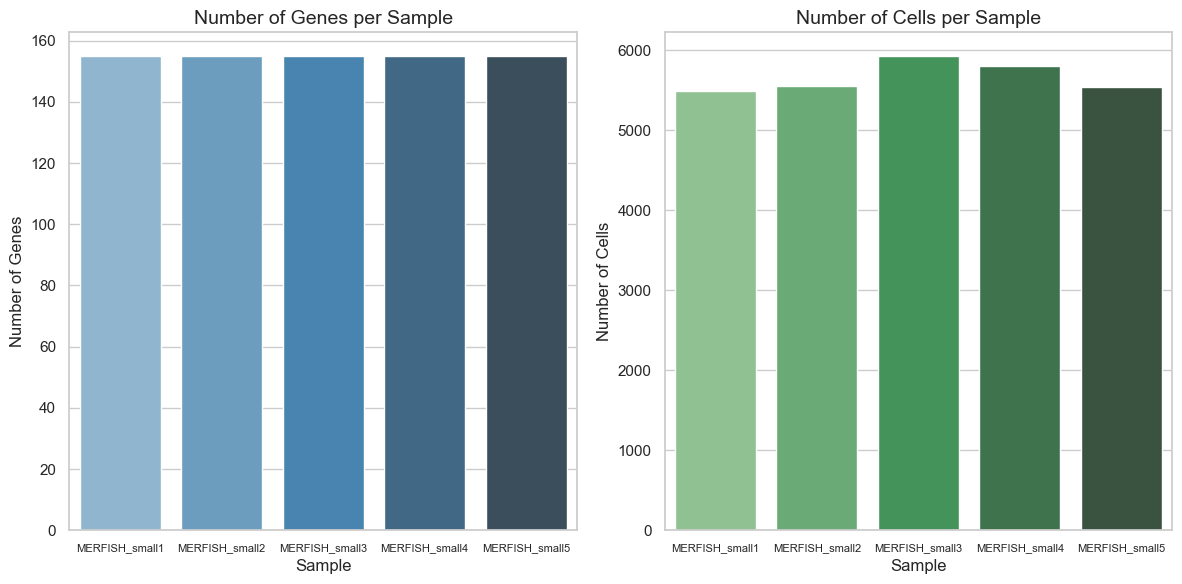

In [393]:
plot_statistics(df_mf)

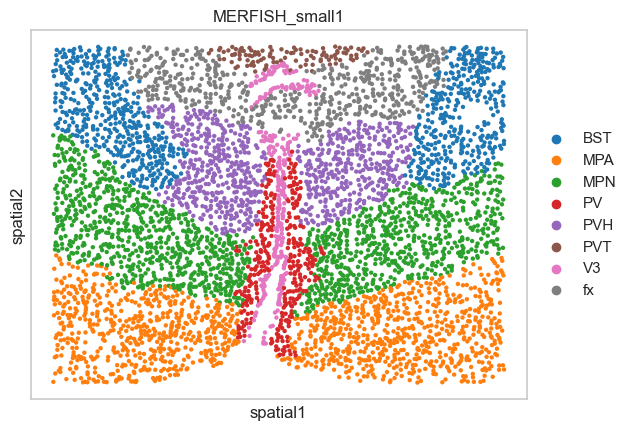

In [394]:
adata = sc.read_h5ad(files[0])
domain_label = df_mf["Domain_label"][0]
title = df_mf["Sample"][0]
sc.pl.embedding(adata, basis="spatial", color=domain_label, size=40, title=title)

## Dataset 2 - STARmap

In [395]:
files = get_files("../data/domain/raw_123", "STARmap")
files = sorted(files, key=lambda x: int(os.path.basename(x).split("STARmap")[1].split(".")[0]))
print(files)

['../data/domain/raw_123/STARmap1.h5ad', '../data/domain/raw_123/STARmap2.h5ad', '../data/domain/raw_123/STARmap3.h5ad', '../data/domain/raw_123/STARmap4.h5ad']


In [396]:
df_sm = create_sample_df(files, "region", "STARmap")
df_sm

,Sample,Dataset,Num_genes,Num_cells,Domain_label,Has_spatial
0,STARmap1,STARmap,1020,1207,region,True
1,STARmap2,STARmap,166,1049,region,True
2,STARmap3,STARmap,166,1053,region,True
3,STARmap4,STARmap,166,1088,region,True


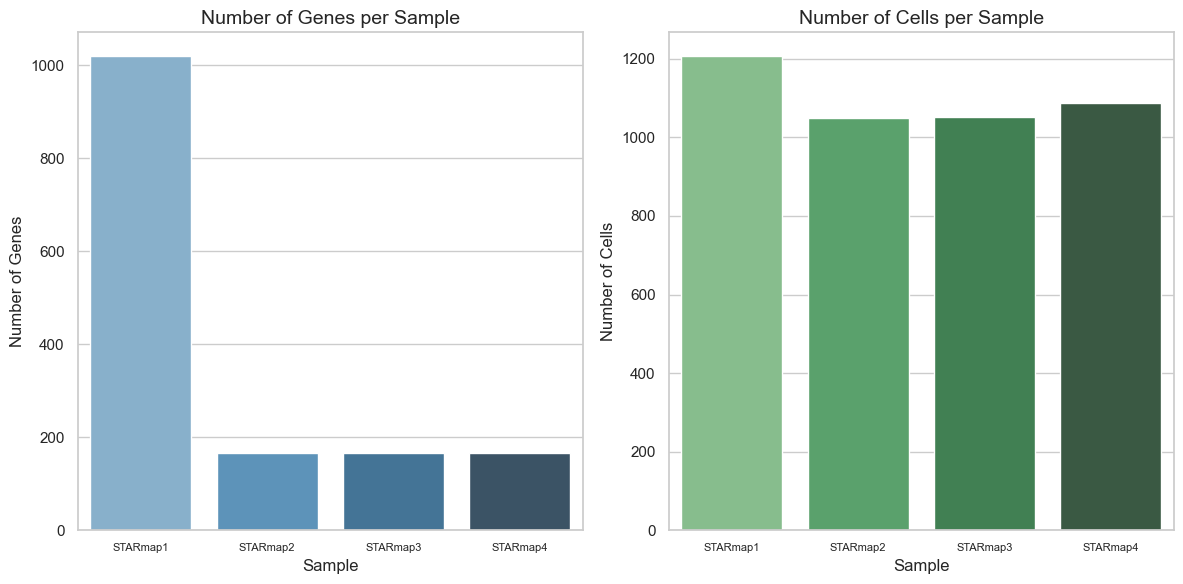

In [397]:
plot_statistics(df_sm)

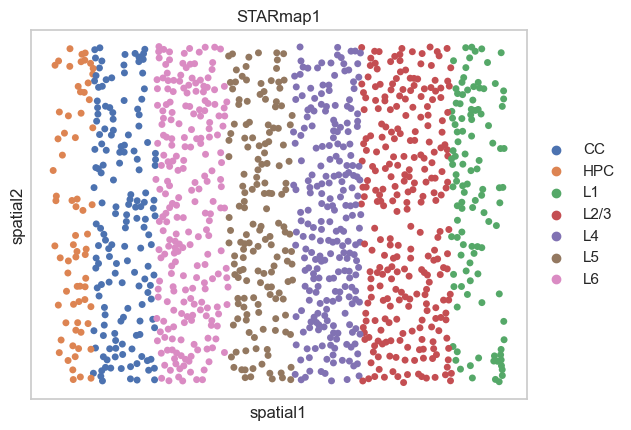

In [398]:
adata = sc.read_h5ad(files[0])
domain_label = df_sm["Domain_label"][0]
title = df_sm["Sample"][0]
sc.pl.embedding(adata, basis="spatial", color=domain_label, size=100, title=title)

## Dataset 3 - BaristaSeq

In [399]:
files = get_files("../data/domain/raw_123", "BaristaSeq")
files = sorted(files, key=lambda x: int(os.path.basename(x).split("BaristaSeq")[1].split(".")[0]))
print(files)

['../data/domain/raw_123/BaristaSeq1.h5ad', '../data/domain/raw_123/BaristaSeq2.h5ad', '../data/domain/raw_123/BaristaSeq3.h5ad']


In [400]:
df_bs = create_sample_df(files, "layer", "BaristaSeq")
df_bs

,Sample,Dataset,Num_genes,Num_cells,Domain_label,Has_spatial
0,BaristaSeq1,BaristaSeq,79,1525,layer,True
1,BaristaSeq2,BaristaSeq,79,2042,layer,True
2,BaristaSeq3,BaristaSeq,79,1690,layer,True


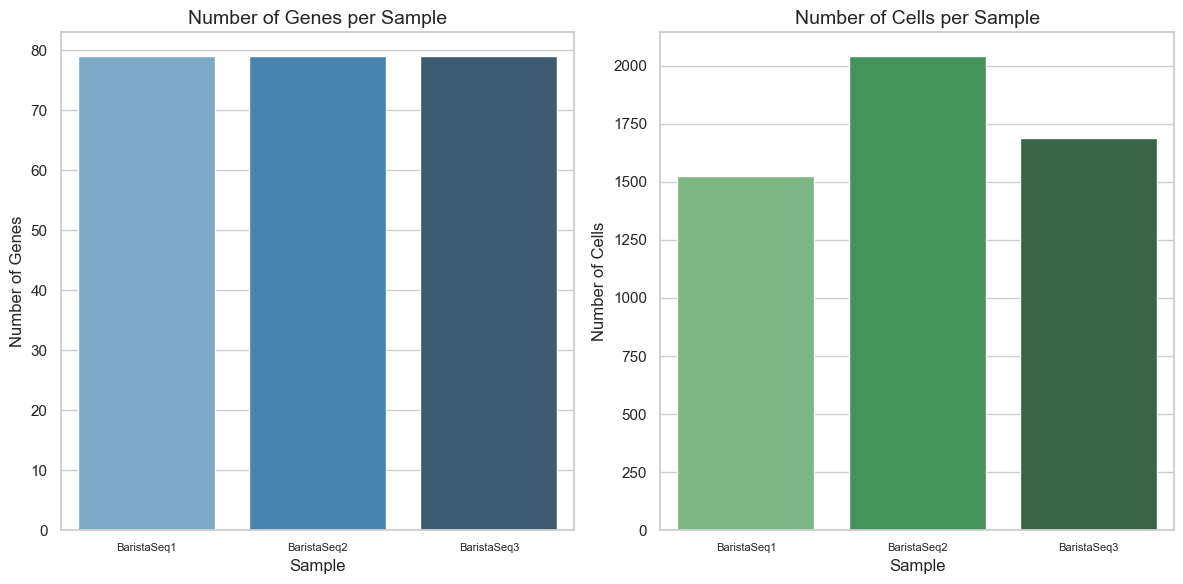

In [401]:
plot_statistics(df_bs)

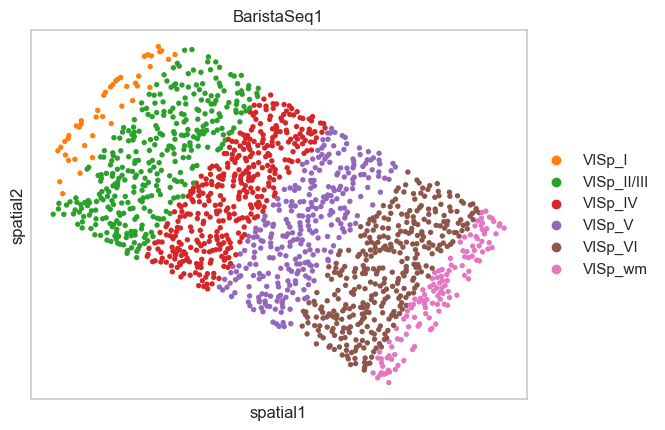

In [402]:
adata = sc.read_h5ad(files[0])
domain_label = df_bs["Domain_label"][0]
title = df_bs["Sample"][0]
sc.pl.embedding(adata, basis="spatial", color=domain_label, size=60, title=title)

## Dataset 7.1 - MERFISH Zhuang 1

In [403]:
files = get_files("../data/domain/raw_7", "Zhuang-ABCA-1")
files = sorted(files, key=lambda x: int(os.path.basename(x).split("Zhuang-ABCA-1.")[1].split(".")[0]))
print(files[0:4])
print(len(files))

['../data/domain/raw_7/Zhuang-ABCA-1.010.h5ad', '../data/domain/raw_7/Zhuang-ABCA-1.011.h5ad', '../data/domain/raw_7/Zhuang-ABCA-1.012.h5ad', '../data/domain/raw_7/Zhuang-ABCA-1.013.h5ad']
129


In [404]:
df_z1 = create_sample_df(files, "parcellation_division", "MERFISH_zhuang_1")
df_z1

,Sample,Dataset,Num_genes,Num_cells,Domain_label,Has_spatial
0,Zhuang-ABCA-1.010,MERFISH_zhuang_1,1122,8027,parcellation_division,True
1,Zhuang-ABCA-1.011,MERFISH_zhuang_1,1122,7596,parcellation_division,True
2,Zhuang-ABCA-1.012,MERFISH_zhuang_1,1122,8040,parcellation_division,True
3,Zhuang-ABCA-1.013,MERFISH_zhuang_1,1122,10266,parcellation_division,True
4,Zhuang-ABCA-1.014,MERFISH_zhuang_1,1122,11088,parcellation_division,True
...,...,...,...,...,...,...
124,Zhuang-ABCA-1.137,MERFISH_zhuang_1,1122,15937,parcellation_division,True
125,Zhuang-ABCA-1.138,MERFISH_zhuang_1,1122,16409,parcellation_division,True
126,Zhuang-ABCA-1.139,MERFISH_zhuang_1,1122,15375,parcellation_division,True
127,Zhuang-ABCA-1.140,MERFISH_zhuang_1,1122,11578,parcellation_division,True


In [405]:
df_z1.describe()

,Num_genes,Num_cells
count,129.0,129.000000
mean,1122.0,20281.612403
std,0.0,7627.601430
min,1122.0,7024.000000
25%,1122.0,12304.000000
50%,1122.0,20795.000000
75%,1122.0,26699.000000
max,1122.0,36636.000000


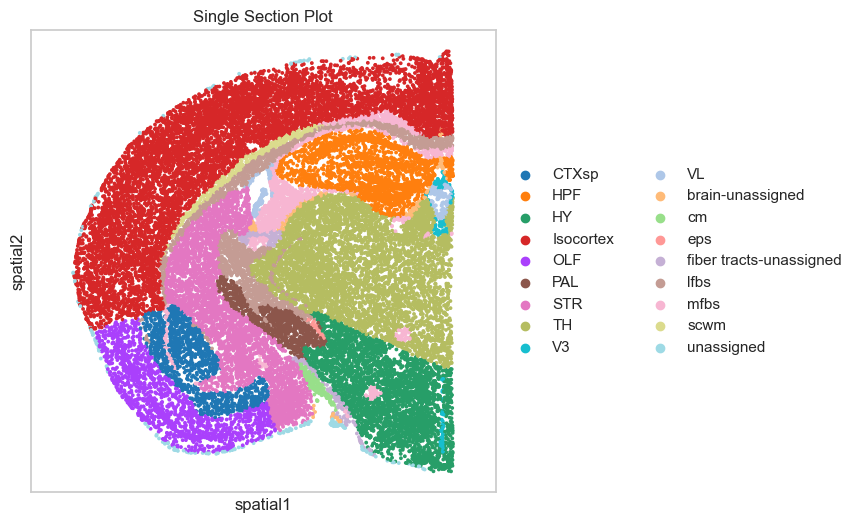

In [406]:
adata = sc.read_h5ad("../data/domain/raw_7/Zhuang-ABCA-1.079.h5ad")
color_key = df_z1["Domain_label"][0]  # Key in adata.obs for coloring

plot_merfish_zhuang(adata, color_key)

## Dataset 7.2 - MERFISH Zhuang 2

In [408]:
files = get_files("../data/domain/raw_7", "Zhuang-ABCA-2")
files = sorted(files, key=lambda x: int(os.path.basename(x).split("Zhuang-ABCA-2.")[1].split(".")[0]))
print(files[0:4])
print(len(files))

['../data/domain/raw_7/Zhuang-ABCA-2.004.h5ad', '../data/domain/raw_7/Zhuang-ABCA-2.005.h5ad', '../data/domain/raw_7/Zhuang-ABCA-2.006.h5ad', '../data/domain/raw_7/Zhuang-ABCA-2.007.h5ad']
54


In [409]:
df_z2 = create_sample_df(files, "parcellation_division", "MERFISH_zhuang_2")
df_z2.head(10)

,Sample,Dataset,Num_genes,Num_cells,Domain_label,Has_spatial
0,Zhuang-ABCA-2.004,MERFISH_zhuang_2,1122,9751,parcellation_division,True
1,Zhuang-ABCA-2.005,MERFISH_zhuang_2,1122,10883,parcellation_division,True
2,Zhuang-ABCA-2.006,MERFISH_zhuang_2,1122,12505,parcellation_division,True
3,Zhuang-ABCA-2.007,MERFISH_zhuang_2,1122,11548,parcellation_division,True
4,Zhuang-ABCA-2.008,MERFISH_zhuang_2,1122,9118,parcellation_division,True
5,Zhuang-ABCA-2.009,MERFISH_zhuang_2,1122,12384,parcellation_division,True
6,Zhuang-ABCA-2.010,MERFISH_zhuang_2,1122,10801,parcellation_division,True
7,Zhuang-ABCA-2.011,MERFISH_zhuang_2,1122,11528,parcellation_division,True
8,Zhuang-ABCA-2.012,MERFISH_zhuang_2,1122,8539,parcellation_division,True
9,Zhuang-ABCA-2.013,MERFISH_zhuang_2,1122,6640,parcellation_division,True


In [410]:
df_z2.describe()

,Num_genes,Num_cells
count,54.0,54.000000
mean,1122.0,19565.185185
std,0.0,8157.015642
min,1122.0,6640.000000
25%,1122.0,12410.750000
50%,1122.0,19962.000000
75%,1122.0,26442.000000
max,1122.0,35960.000000


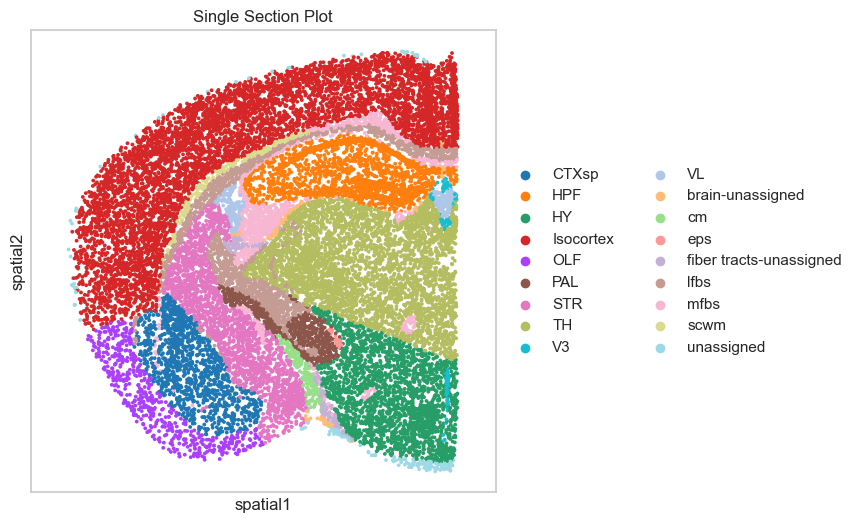

In [411]:
adata = sc.read_h5ad("../data/domain/raw_7/Zhuang-ABCA-2.037.h5ad")
color_key = df_z2["Domain_label"][0]  # Key in adata.obs for coloring

plot_merfish_zhuang(adata, color_key)

## Dataset 7.3 - MERFISH Zhuang 3

In [412]:
files = get_files("../data/domain/raw_7", "Zhuang-ABCA-3")
files = sorted(files, key=lambda x: int(os.path.basename(x).split("Zhuang-ABCA-3.")[1].split(".")[0]))
print(files[0:4])
print(len(files))

['../data/domain/raw_7/Zhuang-ABCA-3.001.h5ad', '../data/domain/raw_7/Zhuang-ABCA-3.002.h5ad', '../data/domain/raw_7/Zhuang-ABCA-3.003.h5ad', '../data/domain/raw_7/Zhuang-ABCA-3.004.h5ad']
22


In [413]:
df_z3 = create_sample_df(files, "parcellation_division", "MERFISH_zhuang_3")
df_z3.head(10)

,Sample,Dataset,Num_genes,Num_cells,Domain_label,Has_spatial
0,Zhuang-ABCA-3.001,MERFISH_zhuang_3,1122,84464,parcellation_division,True
1,Zhuang-ABCA-3.002,MERFISH_zhuang_3,1122,98855,parcellation_division,True
2,Zhuang-ABCA-3.003,MERFISH_zhuang_3,1122,109773,parcellation_division,True
3,Zhuang-ABCA-3.004,MERFISH_zhuang_3,1122,116179,parcellation_division,True
4,Zhuang-ABCA-3.005,MERFISH_zhuang_3,1122,116196,parcellation_division,True
5,Zhuang-ABCA-3.006,MERFISH_zhuang_3,1122,97994,parcellation_division,True
6,Zhuang-ABCA-3.007,MERFISH_zhuang_3,1122,103520,parcellation_division,True
7,Zhuang-ABCA-3.008,MERFISH_zhuang_3,1122,91443,parcellation_division,True
8,Zhuang-ABCA-3.009,MERFISH_zhuang_3,1122,80593,parcellation_division,True
9,Zhuang-ABCA-3.010,MERFISH_zhuang_3,1122,81464,parcellation_division,True


In [414]:
df_z3.describe()

,Num_genes,Num_cells
count,22.0,22.000000
mean,1122.0,71220.090909
std,0.0,31885.208030
min,1122.0,14260.000000
25%,1122.0,44283.000000
50%,1122.0,78604.000000
75%,1122.0,96356.250000
max,1122.0,116196.000000


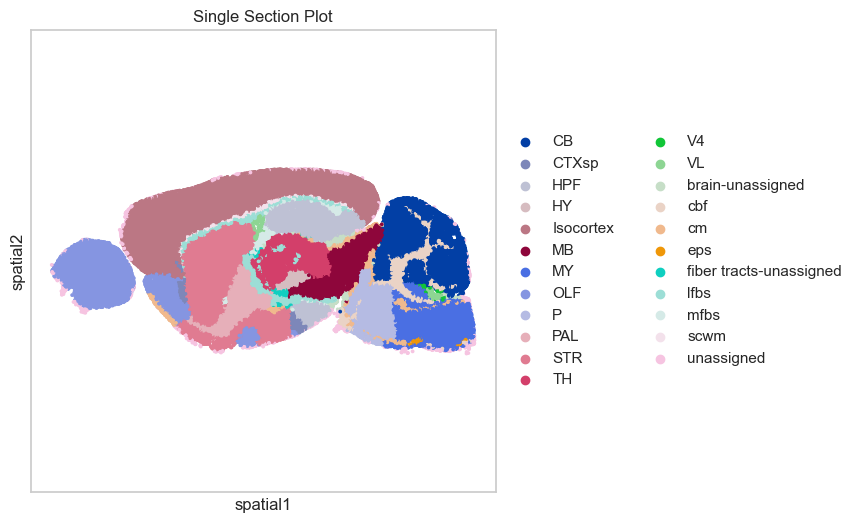

In [415]:
adata = sc.read_h5ad("../data/domain/raw_7/Zhuang-ABCA-3.010.h5ad")
color_key = df_z3["Domain_label"][0]  # Key in adata.obs for coloring

plot_merfish_zhuang(adata, color_key)

## Dataset 7.4 - MERFISH Zhuang 4

In [416]:
files = get_files("../data/domain/raw_7", "Zhuang-ABCA-4")
files = sorted(files, key=lambda x: int(os.path.basename(x).split("Zhuang-ABCA-4.")[1].split(".")[0]))
print(files)

['../data/domain/raw_7/Zhuang-ABCA-4.001.h5ad', '../data/domain/raw_7/Zhuang-ABCA-4.002.h5ad', '../data/domain/raw_7/Zhuang-ABCA-4.003.h5ad']


In [417]:
df_z4 = create_sample_df(files, "parcellation_division", "MERFISH_zhuang_4")
df_z4

,Sample,Dataset,Num_genes,Num_cells,Domain_label,Has_spatial
0,Zhuang-ABCA-4.001,MERFISH_zhuang_4,1122,32311,parcellation_division,True
1,Zhuang-ABCA-4.002,MERFISH_zhuang_4,1122,50053,parcellation_division,True
2,Zhuang-ABCA-4.003,MERFISH_zhuang_4,1122,79997,parcellation_division,True


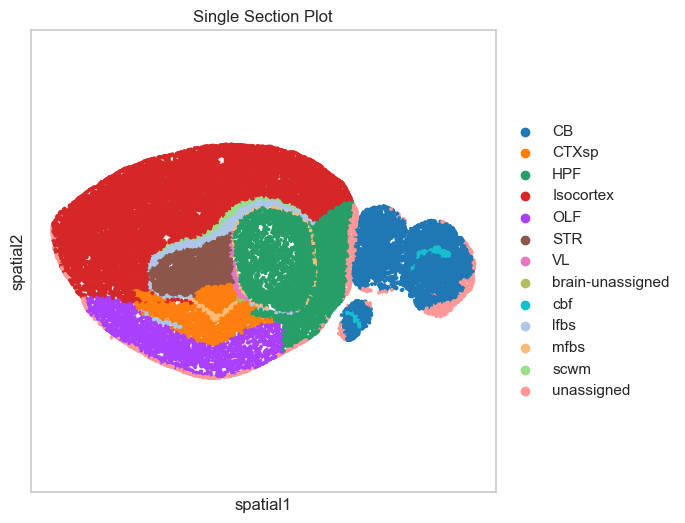

In [418]:
adata = sc.read_h5ad("../data/domain/raw_7/Zhuang-ABCA-4.002.h5ad")
color_key = df_z4["Domain_label"][0]  # Key in adata.obs for coloring

plot_merfish_zhuang(adata, color_key)

## All Datasets

In [419]:
df = pd.concat([df_mf, df_sm, df_bs, df_z1, df_z2, df_z3, df_z4], ignore_index=True)
df

,Sample,Dataset,Num_genes,Num_cells,Domain_label,Has_spatial
0,MERFISH_small1,MERFISH_small,155,5488,domain,True
1,MERFISH_small2,MERFISH_small,155,5557,domain,True
2,MERFISH_small3,MERFISH_small,155,5926,domain,True
3,MERFISH_small4,MERFISH_small,155,5803,domain,True
4,MERFISH_small5,MERFISH_small,155,5543,domain,True
...,...,...,...,...,...,...
215,Zhuang-ABCA-3.023,MERFISH_zhuang_3,1122,17086,parcellation_division,True
216,Zhuang-ABCA-3.024,MERFISH_zhuang_3,1122,14260,parcellation_division,True
217,Zhuang-ABCA-4.001,MERFISH_zhuang_4,1122,32311,parcellation_division,True
218,Zhuang-ABCA-4.002,MERFISH_zhuang_4,1122,50053,parcellation_division,True


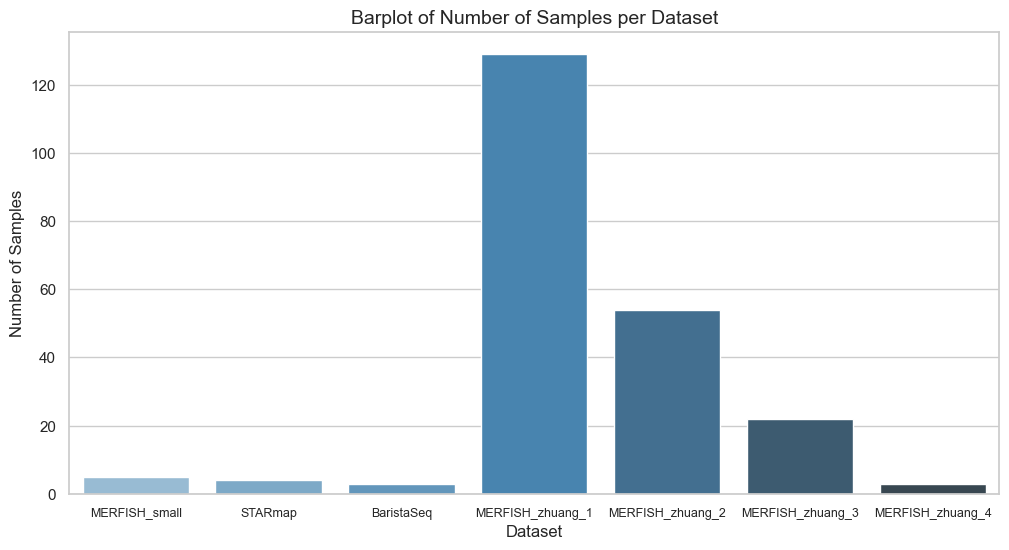

In [457]:
new_order = [
    "MERFISH_small",
    "STARmap",
    "BaristaSeq",
    "MERFISH_zhuang_1",
    "MERFISH_zhuang_2",
    "MERFISH_zhuang_3",
    "MERFISH_zhuang_4"
]
dataset_counts = df['Dataset'].value_counts().reset_index()
dataset_counts = dataset_counts.set_index('Dataset').reindex(new_order).reset_index()


sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(x='Dataset', y='count', data=dataset_counts, hue="Dataset", palette="Blues_d", legend=False)

plt.xlabel('Dataset')
plt.ylabel('Number of Samples')
plt.title('Barplot of Number of Samples per Dataset', fontsize=14)
plt.tick_params(axis='x', labelsize=9)

plt.show()

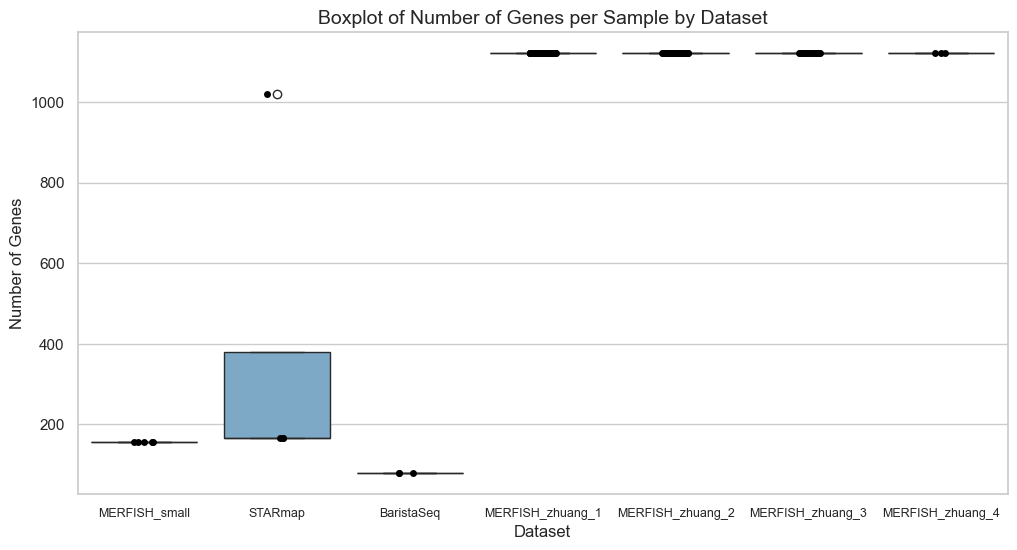

In [460]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.boxplot(x='Dataset', y='Num_genes', data=df, hue="Dataset", palette="Blues_d", legend=False)
sns.stripplot(x='Dataset', y='Num_genes', data=df, color='black', size=5, jitter=True)

plt.xlabel('Dataset')
plt.ylabel('Number of Genes')
plt.title('Boxplot of Number of Genes per Sample by Dataset', fontsize=14)
plt.tick_params(axis='x', labelsize=9)

plt.show()

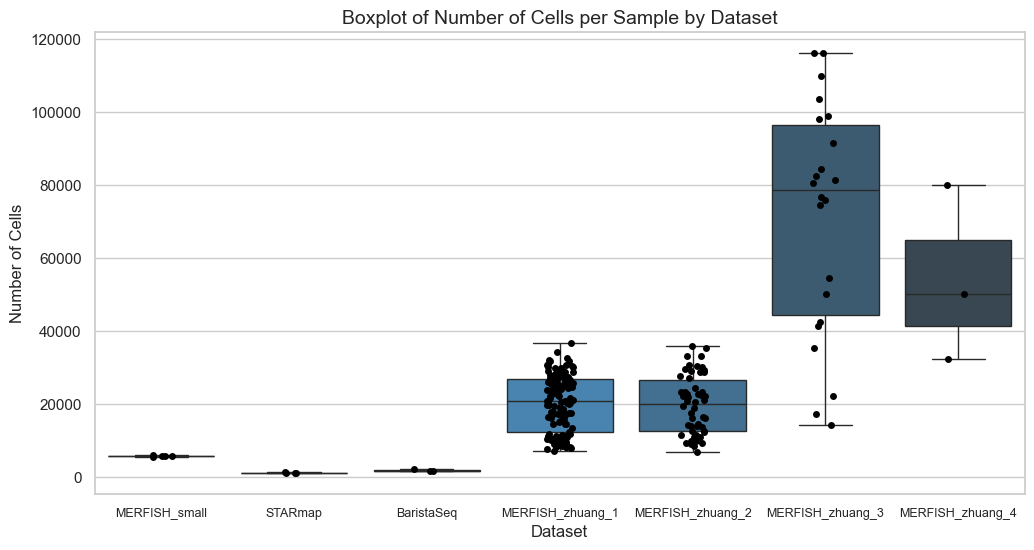

In [463]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.boxplot(x='Dataset', y='Num_cells', data=df, hue="Dataset", palette="Blues_d", legend=False)
sns.stripplot(x='Dataset', y='Num_cells', data=df, color='black', size=5, jitter=True)

plt.xlabel('Dataset')
plt.ylabel('Number of Cells')
plt.title('Boxplot of Number of Cells per Sample by Dataset', fontsize=14)
plt.tick_params(axis='x', labelsize=9)

plt.show()